Import neccesary libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
import scipy.cluster.hierarchy as hierarchy
%matplotlib inline
from collections import defaultdict
import operator
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering


Import file from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file1= '/content/drive/MyDrive/networks analysis/hw2/polblogs.gml.txt'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the file

In [ ]:
# Read the graph from a GML file
G = nx.read_gml(file1, label='id')

# Print the number of nodes and edges in the graph
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())


Number of nodes: 1490
Number of edges: 19090


Find the strongest connected component 

In [ ]:
strongly_connected_components= max(nx.strongly_connected_components(G),key=len)
G_strong= G.subgraph(strongly_connected_components) # G_strong is a subgraph of the original graph 
H=nx.Graph(G_strong) # H is  the G_strong but as a graph not a multigraph 

In [ ]:
# Print the new number of nodes and edges in the graph
print('Number of nodes:', G_strong.number_of_nodes())
print('Number of edges:', G_strong.number_of_edges())

Number of nodes: 793
Number of edges: 15841


Creating a dataframe with the ground truths

In [ ]:
import pandas as pd
# Get a list of dictionaries containing the attributes of each node
node_attrs = {node_id: G_strong.nodes[node_id]['value'] for node_id in G_strong.nodes()}
node_df = pd.DataFrame.from_dict(node_attrs, orient='index', columns=['Ground truth'])
node_df

,Ground truth
1,0
2,0
5,0
8,0
10,0
...,...
1482,1
1485,1
1486,1
1487,1


Create a list of lists with the 2 ground truths communities

In [ ]:
# Access the values of the nodes
node_values = nx.get_node_attributes(G_strong, 'value')
# Separate the nodes based on their values
#Create the ground truth communities as separate lists
community_0 = [node for node, value in node_values.items() if value == 0]
community_1 = [node for node, value in node_values.items() if value == 1]
print('The nodes inside the community 0: ',community_0)
print('The length of the community :',len(community_0))
print('The nodes inside the community 1: ',community_1)
print('The length of the community :',len(community_1))

community_ground_truth=[]
community_ground_truth.append(community_0)
community_ground_truth.append(community_1)


The nodes inside the community 0:  [1, 2, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 45, 46, 47, 53, 55, 64, 65, 72, 73, 75, 79, 82, 85, 87, 89, 90, 92, 95, 97, 98, 99, 100, 101, 102, 109, 110, 113, 114, 115, 118, 119, 123, 124, 130, 136, 137, 140, 142, 143, 144, 150, 151, 155, 156, 157, 159, 160, 162, 165, 167, 168, 170, 172, 178, 179, 180, 181, 185, 187, 188, 189, 190, 191, 192, 193, 194, 202, 203, 204, 205, 209, 210, 218, 220, 223, 224, 227, 229, 238, 241, 243, 249, 253, 256, 259, 264, 267, 268, 273, 275, 278, 279, 280, 281, 282, 283, 288, 289, 295, 297, 298, 299, 300, 301, 307, 310, 311, 312, 313, 316, 317, 321, 323, 326, 329, 331, 332, 333, 335, 337, 341, 345, 347, 349, 350, 351, 353, 358, 361, 363, 370, 371, 374, 377, 379, 380, 381, 387, 389, 391, 393, 394, 396, 399, 401, 402, 405, 406, 409, 410, 415, 417, 420, 422, 424, 426, 427, 431, 432, 434, 436, 438, 439, 440, 441, 444, 446, 449, 450, 451, 452, 453, 454, 460,

Visualizing the Graph with the ground truths

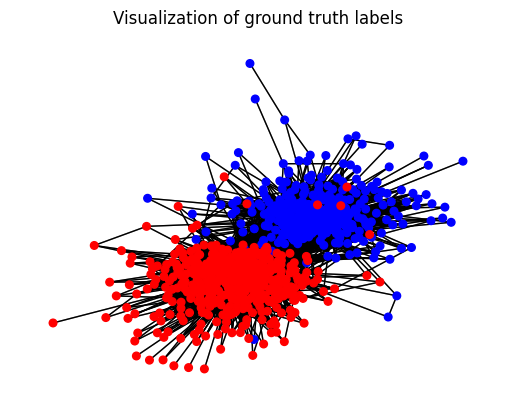

In [ ]:
#Visualization of ground truth
node_values = nx.get_node_attributes(H, 'value')
ground_truth= list(node_values.values())
color= []
for i in ground_truth:
  if i ==0:
    color.append('blue')
  else:
    color.append('red')
pos= nx.spring_layout(H)

plt.title('Visualization of ground truth labels')
nx.draw(H,pos,node_color=color,node_size=30)
nx.draw_networkx_edges(H,pos,alpha=0.4)
plt.savefig('/content/drive/MyDrive/networks analysis/hw2/Ground truths')

plt.show() 

In [ ]:
# a) clique percolation
c1= list(nx.community.k_clique_communities(H,17))

print(len(c1))
j=1
for i in c1:
  print('community',j,': ')
  print(len(list(i)))
  sorted_list= sorted(list(i))
  print(sorted_list)
  j+=1

1
community 1 : 
68
[13, 14, 31, 40, 55, 72, 75, 99, 118, 144, 150, 155, 172, 180, 187, 189, 191, 202, 288, 297, 323, 347, 363, 387, 394, 405, 417, 431, 434, 441, 454, 460, 467, 468, 472, 483, 489, 492, 493, 495, 512, 524, 535, 547, 563, 566, 570, 577, 591, 604, 615, 618, 623, 634, 641, 642, 644, 650, 664, 669, 675, 676, 687, 726, 727, 729, 754, 756]


In [ ]:
# b) Modularity Maximization method 
#Clauset-Newman-Moore greedy modularity maximization
c2 = list(nx.algorithms.community.greedy_modularity_communities(G_strong))
# Print the communities
#for i, community in enumerate(communities):
    #print(f'Community {i+1}: {community}')
print(len(c2))
j=1
for i in c2:
  print('community',j,': ')
  print(len(list(i)))
  print(list(i))
  j+=1

6
community 1 : 
450
[1024, 1026, 1028, 1031, 1036, 1037, 1038, 1040, 1041, 1044, 1045, 1047, 1048, 1049, 1051, 1052, 1053, 1054, 1055, 1060, 1061, 1062, 1063, 1065, 1068, 1069, 1070, 1071, 1072, 1076, 1077, 1080, 1081, 1082, 1084, 1085, 1087, 1088, 1090, 1091, 1092, 1093, 1095, 1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1112, 1114, 1116, 1121, 1123, 1124, 1125, 1126, 1128, 1129, 1130, 1133, 1135, 1141, 119, 1144, 1146, 1149, 1150, 1152, 1153, 1154, 136, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1169, 1172, 1175, 1177, 1179, 1185, 1187, 1188, 1191, 1192, 1194, 1195, 1196, 1198, 1199, 1200, 1201, 1202, 1203, 1205, 1206, 1207, 1209, 1210, 1211, 1213, 1214, 1215, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1226, 203, 1227, 1231, 1232, 1236, 1238, 1240, 1242, 1244, 1245, 1246, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1264, 1266, 1268, 1269, 1270, 1271, 249, 1274, 1275, 1277, 1278, 1279, 1280, 1287, 1288, 1290, 1295, 1296, 1298, 1300, 1301, 1305, 1306, 1307, 1308

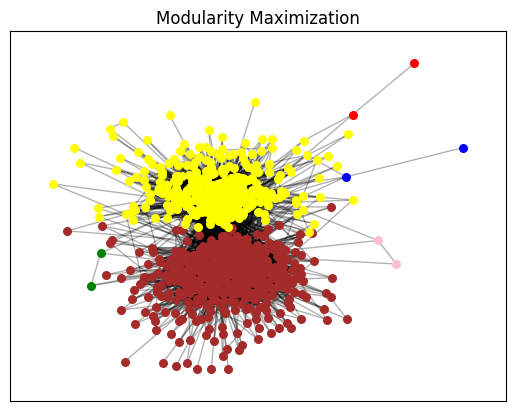

In [ ]:
pos=nx.spring_layout(H)
colors=['brown','yellow','red','blue','pink','green']
plt.figure()
plt.title('Modularity Maximization')
counter=0
for i in c2:
  nx.draw_networkx_nodes(H,pos,i,node_size=30,node_color=colors[counter])
  counter+=1
nx.draw_networkx_edges(H,pos,alpha=0.3)
plt.savefig('/content/drive/MyDrive/networks analysis/hw2/Modularity Maximization')

plt.show()

In [ ]:
#c hierarchical clustering Girvan-Newman
def girvan_newman(G):
    """ run the algorithm of Girvan + Newman up to the first separation
        and return list of components of G, list of edges removed
    """
    
    # we're going to remove edges, so do it on a copy of the original graph
    G = G.copy()
    
    def find_best_edge(G0):
        """ get the edge from G0 with highest betweenness centrality"""
        eb = nx.edge_betweenness_centrality(G0)
        edges = eb.keys()
        return max(edges, key=lambda e: eb[e])

    removed_edges = []
    # Proceed until we separate the graph
    while nx.number_connected_components(G) == 1:
        u, v = find_best_edge(G)
        G.remove_edge(u, v)
        removed_edges.append((u, v))

    return list(nx.connected_components(G)) , removed_edges

In [ ]:

c3 , removed_edges = girvan_newman(H)
print(len(c3))
j=1
for i in c3:
  print('community',j,': ')
  print(len(list(i)))
  print(list(i))
  j+=1

2
community 1 : 
791
[1, 2, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 45, 46, 47, 53, 55, 64, 65, 72, 73, 75, 79, 82, 85, 87, 89, 90, 92, 95, 97, 98, 99, 100, 101, 102, 109, 110, 113, 114, 115, 118, 119, 123, 124, 130, 136, 137, 140, 142, 143, 144, 150, 151, 155, 156, 157, 159, 160, 162, 165, 167, 168, 170, 172, 178, 179, 180, 181, 185, 187, 188, 189, 190, 191, 192, 193, 194, 202, 203, 204, 205, 209, 210, 218, 220, 223, 224, 227, 229, 238, 241, 243, 249, 253, 256, 259, 264, 267, 268, 273, 275, 278, 279, 280, 281, 282, 283, 288, 289, 295, 297, 298, 299, 300, 301, 307, 310, 311, 312, 313, 316, 317, 321, 323, 326, 329, 331, 332, 333, 335, 337, 341, 345, 347, 349, 350, 351, 353, 358, 361, 363, 370, 371, 374, 377, 379, 381, 387, 389, 391, 393, 394, 396, 399, 401, 402, 405, 406, 409, 410, 415, 417, 420, 422, 424, 426, 427, 431, 432, 434, 436, 438, 439, 440, 441, 444, 446, 449, 450, 451, 452, 453, 454, 460, 461, 465, 466, 467

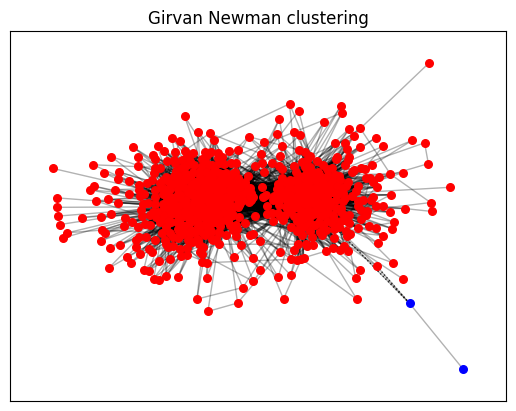

In [ ]:
pos=nx.spring_layout(H)
colors=['red','blue']
plt.figure()
plt.title('Girvan Newman clustering')
counter=0
for i in c3:
  nx.draw_networkx_nodes(H,pos,i,node_size=30,node_color=colors[counter])
  counter+=1
nx.draw_networkx_edges(H,pos,alpha=0.3)
nx.draw_networkx_edges(H,pos,edgelist=removed_edges,style='dotted',alpha=0.8)
plt.savefig('/content/drive/MyDrive/networks analysis/hw2/Girvan Newman clustering')

plt.show()

In [ ]:
#d) Spectral Clustering
def spec_clustering(graph,k): 
  # Get the adjacency matrix
  # Convert the graph to a matrix
  A = nx.to_numpy_array(graph)
  # Compute the graph Laplacian matrix
  D = np.diag(np.sum(A, axis=1))
  L = D - A
  # Compute the first k eigenvectors of the Laplacian matrix
  vals, vecs = np.linalg.eigh(L)
  vecs = vecs[:, :k]
  # Cluster the nodes using k-means on the embedded space
  sc = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans')
  labels = sc.fit_predict(vecs)

  # Create a list of communities and keep the real labels
  node_to_cluster = {}
  for node, label in zip(graph.nodes(), labels):
      node_to_cluster[node] = label
  communities = [[] for _ in range(k)]

  for node, cluster in node_to_cluster.items():
      communities[cluster].append(node)
  return communities

c4= spec_clustering(H,2)
#Preview the communities created
j=1
for i in c4:
  print('community',j,': ')
  print(len(list(i)))
  print(list(i))
  j+=1

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


community 1 : 
433
[5, 17, 19, 110, 193, 203, 280, 312, 370, 401, 450, 500, 507, 534, 554, 584, 625, 674, 679, 684, 720, 744, 762, 763, 764, 766, 767, 768, 772, 773, 775, 776, 777, 778, 781, 782, 784, 786, 787, 791, 792, 793, 796, 801, 802, 803, 805, 806, 807, 808, 810, 812, 813, 814, 815, 816, 817, 822, 823, 824, 826, 828, 829, 830, 831, 833, 835, 838, 839, 840, 841, 842, 843, 847, 851, 852, 854, 855, 856, 857, 858, 859, 860, 862, 863, 864, 865, 870, 873, 874, 876, 878, 879, 880, 881, 882, 883, 885, 887, 891, 892, 893, 894, 895, 897, 899, 900, 901, 903, 904, 907, 908, 909, 911, 914, 915, 916, 918, 919, 921, 922, 926, 930, 932, 933, 934, 935, 937, 938, 940, 941, 942, 943, 944, 946, 950, 952, 953, 955, 956, 958, 959, 960, 961, 962, 963, 964, 965, 966, 968, 970, 971, 972, 973, 974, 975, 980, 981, 982, 988, 989, 991, 992, 993, 995, 1000, 1001, 1003, 1006, 1007, 1008, 1009, 1010, 1013, 1015, 1020, 1024, 1026, 1028, 1031, 1036, 1037, 1038, 1040, 1041, 1044, 1045, 1047, 1048, 1049, 1052, 105

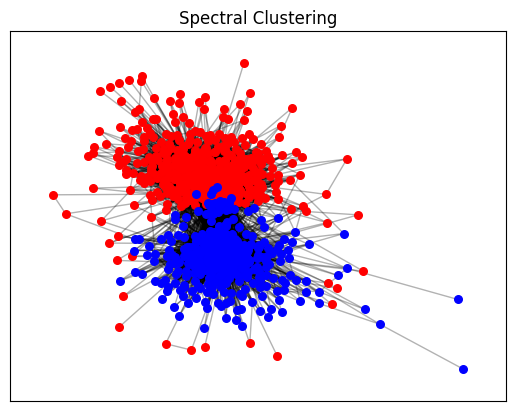

In [ ]:
pos=nx.spring_layout(H)
colors=['red','blue']
plt.figure()
plt.title('Spectral Clustering')
counter=0
for i in c4:
  nx.draw_networkx_nodes(H,pos,i,node_size=30,node_color=colors[counter])
  counter+=1
nx.draw_networkx_edges(H,pos,alpha=0.3)
plt.savefig('/content/drive/MyDrive/networks analysis/hw2/Spectral Clustering')

plt.show()

In [ ]:
#e) AgglomerativeClustering
# Load graph
# Perform agglomerative clustering
k = 2 # number of clusters
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
adj_matrix = nx.adjacency_matrix(H).toarray()
labels = agg.fit_predict(adj_matrix)

# Create a list of communities and keep the real labels
node_to_cluster = {}
for node, label in zip(G_strong.nodes(), labels):
    node_to_cluster[node] = label
c5 = [[] for _ in range(k)]

for node, cluster in node_to_cluster.items():
    c5[cluster].append(node)

#Preview the communities created
j=1
for i in c5:
  print('community',j,': ')
  print(len(list(i)))
  print(list(i))
  j+=1

community 1 : 
696
[1, 2, 5, 8, 10, 12, 15, 17, 18, 19, 21, 22, 27, 28, 29, 32, 33, 34, 36, 38, 41, 42, 45, 47, 53, 64, 65, 73, 79, 82, 85, 87, 90, 92, 95, 97, 98, 100, 109, 110, 113, 114, 115, 119, 123, 124, 130, 136, 140, 142, 143, 151, 156, 157, 159, 160, 162, 165, 168, 178, 179, 181, 185, 188, 190, 192, 193, 194, 203, 204, 205, 209, 220, 223, 224, 227, 229, 238, 241, 243, 249, 253, 256, 259, 264, 267, 268, 273, 275, 278, 279, 280, 281, 282, 283, 289, 295, 298, 299, 300, 307, 310, 311, 312, 313, 316, 317, 321, 329, 331, 332, 333, 335, 337, 341, 345, 349, 350, 351, 353, 358, 361, 370, 377, 379, 380, 381, 391, 393, 396, 399, 401, 402, 406, 409, 410, 415, 420, 422, 424, 426, 427, 431, 432, 436, 438, 439, 440, 444, 449, 450, 451, 452, 453, 466, 469, 475, 477, 479, 480, 481, 484, 490, 491, 494, 498, 500, 501, 503, 505, 507, 508, 515, 517, 519, 521, 527, 532, 534, 536, 538, 539, 541, 544, 549, 550, 551, 553, 554, 556, 559, 560, 562, 564, 567, 568, 572, 573, 578, 584, 587, 589, 590, 596, 5

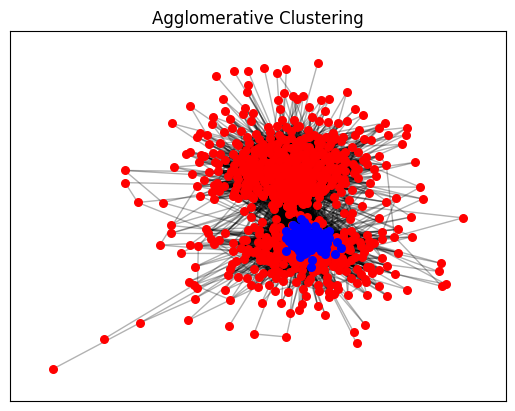

In [ ]:
pos=nx.spring_layout(H)
colors=['red','blue']
plt.figure()
plt.title('Agglomerative Clustering')
counter=0
for i in c5:
  nx.draw_networkx_nodes(H,pos,i,node_size=30,node_color=colors[counter])
  counter+=1
nx.draw_networkx_edges(H,pos,alpha=0.3)
plt.savefig('/content/drive/MyDrive/networks analysis/hw2/Agglomerative Clustering')
plt.show()

Create the functions necessary for calculating the metrics.


In [ ]:
#metrics
#Function that calculates the Conductance for each community and then returns the minimum
def min_conductance(communities, graph):
    min_cond = float("inf")
    min_comm = None
    for comm in communities:
        cut_size = nx.algorithms.cuts.cut_size(graph, comm)
        volume = sum(graph.degree[node] for node in comm)
        complement_volume = sum(graph.degree[node] for node in graph.nodes() if node not in comm)
        conductance = cut_size / min(volume, complement_volume)
        if conductance < min_cond:
            min_cond = conductance
            min_comm = comm
    return min_comm, min_cond

def density(communities, graph):
    densities = []
    for community in communities:
        subgraph = graph.subgraph(community)
        m = subgraph.number_of_edges()
        n = subgraph.number_of_nodes()
        if n <= 1:
            densities.append(0.0)
        else:
            densities.append((2 * m) / (n * (n - 1)))
    return sum(densities) / len(densities)



In [ ]:
def purity(com_0,com_1,clusters):
  max_cluster=[]
  for community in clusters:
    count0=0
    count1=0
    for i in community:
      if i in com_0:
        count0+=1
      else:
        count1+=1
    max_cluster.append(max(count0,count1))
  summ= sum(max_cluster)
  pur= summ/(len(com_0)+len(com_1))
  return pur



In [ ]:
from scipy.special import binom


In [ ]:
def tp(community_0,community_1,communities):
  max_label=[]
  for community in communities:
    count0=0
    count1=0
    for i in community:
        if i in community_0:
          count0 +=1
        else:
          count1 +=1
    max_label.append(max(count0,count1))
  true_positives = binom(2,2)
  for i in range(len(communities)):
    true_positives += binom(max_label[i],2)
  return true_positives
 

def fp(community_0,community_1,communities):
  false_positives = 0
  for community in communities:
    count0=0
    count1=0
    for i in community:
       if i in community_0:
         count0 +=1
       else:
         count1 +=1
    false_positives += count0*count1 
  return false_positives

In [ ]:
def sum_of_products(numbers): # i need this for the function that calculates the false negatives
    """Returns the sum of each number multiplied with every other number"""
    result = 0
    for i in range(len(numbers)):
        for j in range(i + 1, len(numbers)):
            result += numbers[i] * numbers[j]
    return result

In [ ]:
def fn(community_0,community_1,communities):
  counter0=[]
  counter1=[]
  for community in communities:
    count0=0
    count1=0
    for i in community:
      if i in community_0:
         count0 +=1
      else:
         count1 +=1
    counter0.append(count0)
    counter1.append(count1)
  false_negatives = (sum_of_products(counter0)+sum_of_products(counter1))
  return false_negatives

In [ ]:
# i dont use the tn function but it was diffuclt to create so i leave it here.
def tn(community_0,community_1,communities):
  counter0=[]
  counter1=[]
  all_count=[]
  for community in communities:
    count0=0
    count1=0
    for i in community:
      if i in community_0:
         count0 +=1
      else:
         count1 +=1
    counter0.append(count0)
    counter1.append(count1)
  true_negatives=0
  all_count.append(counter0)
  all_count.append(counter1)
  # loop through each element in the list
  for i in range(len(all_count)):
      for j in range(len(all_count[i])):
          product = all_count[i][j]
          # multiply the element with all other elements not on the same row and column
          for x in range(len(all_count)):
              for y in range(len(all_count[x])):
                  if x != i and y != j and x>i:
                      true_negatives += product * all_count[x][y]



  return true_negatives

def recall(community_0,community_1,communities):
  true_pos= tp(community_0,community_1,communities)
  false_neg= fn(community_0,community_1,communities)
  rec= true_pos/(true_pos+false_neg)
  return rec

def precision(community_0,community_1,communities):
  true_pos= tp(community_0,community_1,communities)
  false_pos= fp(community_0,community_1,communities)
  prec= true_pos/(true_pos+false_pos)
  return prec

In [ ]:
def calc_nmi(community_0, communities):
    import math
    countAll = 0
    countZero = 0
    countOne = 0
    # Entropy of Class Labels
    for community in communities:
      for i in community:
        if i in community_0:
            countZero += 1
            countAll += 1
        else:
            countOne += 1
            countAll += 1
    p0 = countZero / countAll
    p1 = countOne / countAll
    h_y = - (p0 * math.log2(p0)) - (p1 * math.log2(p1))

    # Entropy of Cluster Labels
    h_c = 0
    for community in communities:
      lenght = len(community)
      prob = lenght / countAll
      h_c -= prob * math.log2(prob)

    # Mutual Information
    h_y_c = 0
    for community in communities:
      count_Zero = 0
      count_One = 0
      count_All = 0

      for i in community:
        if i in community_0:
            count_Zero += 1
            count_All += 1
        else:
            count_One += 1
            count_All += 1
      prob0 = count_Zero / count_All
      prob1 = count_One / count_All
      prob_communities = count_All / countAll
      # print(prob0, prob1, prob_communities)
      if prob0 != 0:
        h_y_c -= prob_communities * (prob0 * math.log2(prob0))
      if prob1 != 0:
        h_y_c -= prob_communities * (prob1 * math.log2(prob1))

    i_y_c = h_y - h_y_c
    nmi = (2 * i_y_c) / (h_y + h_c)
    return nmi

Results

In [ ]:
#Ground truth 
mod=nx.algorithms.community.modularity(H,community_ground_truth )
print('Modularity = ',mod)

_, con=min_conductance(community_ground_truth,H)
print('Conductance = ',con)

den= density(community_ground_truth,H)
print('Density = ',den)



Modularity =  0.41509812472930163
Conductance =  0.0875298835505514
Density =  0.08116949343840099


In [ ]:
#clique percolation method 

#mod1=nx.algorithms.community.modularity(H, c1)
#print('Modularity = ',mod1)
#print(type(c1))
#test= list(c1)
#mod1=nx.algorithms.community.modularity(H, test)
#print('Modularity = ',mod1)


_, con1=min_conductance(c1,H)
print('Conductance = ',con1)

den1= density(c1,H)
print('Density = ',den1)


purity1 = purity(community_0, community_1, c1)
print('Purity = ',purity1)

prec1= precision(community_0,community_1,c1)
rec1= recall(community_0,community_1,c1)
print('Precision: ',prec1)
print('Recall: ',rec1)




Conductance =  0.5241971958389868
Density =  0.6927129060579456
Purity =  0.08575031525851198
Precision:  1.0
Recall:  1.0


In [ ]:
#Modularity Maximization
mod2=nx.algorithms.community.modularity(H, c2)
print('Modularity = ',mod2)

_, con2=min_conductance(c2,H)
print('Conductance = ',con2)

den2= density(c2,H)
print('Density = ',den2)


purity2 = purity(community_0, community_1, c2)
print('Purity = ',purity2)

prec2= precision(community_0,community_1,c2)
rec2= recall(community_0,community_1,c2)
print('Precision: ',prec2)
print('Recall: ',rec2)

nmi2= calc_nmi(community_0, c2)
print('NMI: ',nmi2)


Modularity =  0.43340662417690273
Conductance =  0.06916153481762198
Density =  0.695273903507312
Purity =  0.969735182849937
Precision:  0.9384190590365902
Recall:  0.9271152271152271
NMI:  0.7712893397599005


In [ ]:
#Girvan Newman
mod3=nx.algorithms.community.modularity(H, c3)
print('Modularity = ',mod3)

_, con3=min_conductance(c3,H)
print('Conductance = ',con3)

den3= density(c3,H)
print('Density = ',den3)


purity3 = purity(community_0, community_1, c3)
print('Purity = ',purity2)

prec3= precision(community_0,community_1,c3)
rec3= recall(community_0,community_1,c3)
print('Precision: ',prec3)
print('Recall: ',rec3)

nmi3= calc_nmi(community_0, c3)
print('NMI: ',nmi3)

Modularity =  0.00014825795582298066
Conductance =  0.5
Density =  0.5215765974811567
Purity =  0.969735182849937
Precision:  0.3871866073946949
Recall:  0.9928892329947739
NMI:  0.005849825255195412


In [ ]:
#Spectral clustering

mod4=nx.algorithms.community.modularity(H, c4)
print('Modularity = ',mod4)

_, con4=min_conductance(c4,H)
print('Conductance = ',con4)

den4 = density(c4,H)
print('Density = ',den4)


purity4 = purity(community_0, community_1, c4)
print('Purity = ',purity4)

prec4= precision(community_0,community_1,c4)
rec4= recall(community_0,community_1,c4)
print('Precision: ',prec4)
print('Recall: ',rec4)

nmi4= calc_nmi(community_0, c4)
print('NMI: ',nmi4)



Modularity =  0.3478319440317309
Conductance =  0.16407484407484407
Density =  0.07706239759222448
Purity =  0.9331651954602774
Precision:  0.8777984541418709
Recall:  0.8737033080263732
NMI:  0.6450837780112988


In [ ]:
#Agglomerative Clustering
mod5=nx.algorithms.community.modularity(H, c5)
print('Modularity = ',mod5)

_, con5=min_conductance(c5,H)
print('Conductance = ',con5)

den5= density(c5,H)
print('Density = ',den5)


purity5 = purity(community_0, community_1, c5)
print('Purity = ',purity5)

prec5= precision(community_0,community_1,c5)
rec5= recall(community_0,community_1,c5)
print('Precision: ',prec5)
print('Recall: ',rec5)

nmi5= calc_nmi(community_0, c5)
print('NMI: ',nmi5)



Modularity =  0.18050833894368323
Conductance =  0.3991206643869077
Density =  0.2802134616515817
Purity =  0.6796973518284993
Precision:  0.47632774528187477
Recall:  0.8056265581116476
NMI:  0.2090730040123012


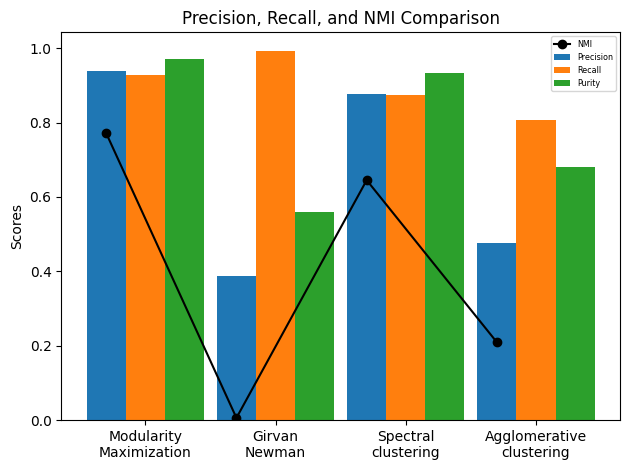

In [ ]:
import matplotlib.pyplot as plt
methods = [ 'Modularity Maximization', 'Girvan Newman', 'Spectral clustering', 'Agglomerative clustering']
precision = [prec2, prec3, prec4, prec5]
recall = [ rec2, rec3, rec4, rec5]
nmi = [ nmi2, nmi3, nmi4, nmi5]
purity=[purity2,purity3,purity4,purity5]

# Plotting the precision, recall, and NMI
x = range(len(methods))
width = 0.3

fig, ax = plt.subplots()
precision_bar = ax.bar(x, precision, width, label='Precision')
recall_bar = ax.bar([i + width for i in x], recall, width, label='Recall')
pyrity_bar = ax.bar([i + 2*width for i in x], purity, width, label='Purity')

nmi_line = ax.plot(x, nmi, marker='o', linestyle='-', color='black', label='NMI')

# Setting labels and ticks
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and NMI Comparison')
# Modifying x-axis label
formatted_labels = [label.replace(' ', '\n') for label in methods]
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(formatted_labels)
ax.legend(fontsize='xx-small')

# Displaying the graph
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/networks analysis/hw2/Precision, Recall, and NMI Comparison')
plt.show()



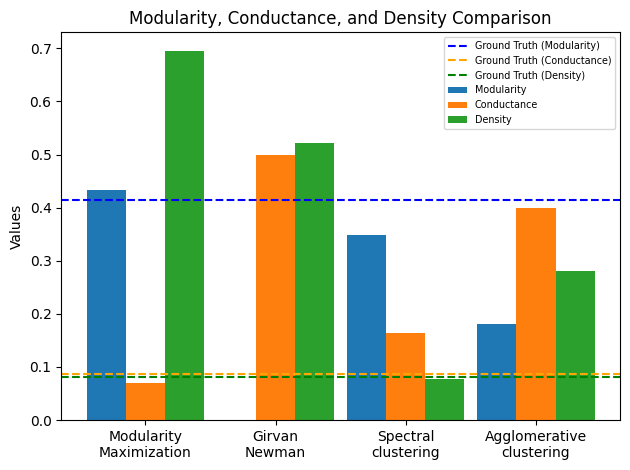

In [ ]:
import matplotlib.pyplot as plt

methods = ['Modularity Maximization', 'Girvan Newman', 'Spectral clustering', 'Agglomerative clustering']
modularity = [mod2, mod3, mod4, mod5]
conductance = [ con2, con3, con4, con5]
density = [den2, den3, den4, den5]
ground_truth_modularity = mod
ground_truth_conductance = con
ground_truth_density = den

# Plotting the modularity, conductance, and density
x = range(len(methods))
width = 0.3

fig, ax = plt.subplots()
modularity_bar = ax.bar(x, modularity, width, label='Modularity')
conductance_bar = ax.bar([i + width for i in x], conductance, width, label='Conductance')
density_bar = ax.bar([i + (2 * width) for i in x], density, width, label='Density')

# Adding ground truth values as horizontal lines
ax.axhline(ground_truth_modularity, color='blue', linestyle='--', label='Ground Truth (Modularity)')
ax.axhline(ground_truth_conductance, color='orange', linestyle='--', label='Ground Truth (Conductance)')
ax.axhline(ground_truth_density, color='green', linestyle='--', label='Ground Truth (Density)')

# Setting labels and ticks
ax.set_ylabel('Values')
ax.set_title('Modularity, Conductance, and Density Comparison')
formatted_labels = [label.replace(' ', '\n') for label in methods]
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(formatted_labels)
ax.legend(fontsize='x-small')  # Adjusting the legend's font size

# Displaying the graph
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/networks analysis/hw2/Modularity_Conductance_Density_Comparison.png')
plt.show()

Synthetic networks


In [ ]:
'''
Create graphs using:
powerlaw_cluster_graph(n, m, p, seed=None)
Holme and Kim algorithm for growing graphs with powerlaw degree distribution and approximate average clustering.
Parameters
:
n
int
the number of nodes

m
int
the number of random edges to add for each new node

p
float,
Probability of adding a triangle after adding a random edge

seed
integer, random_state, or None (default)
Indicator of random number generation state. See Randomness.
'''
n = 1500
m= 25 # I describe how I calculate it exactly in the lower cell
graphs = []
parameters = [(m, 0.05), (m, 0.5), (m, 0.9)]  # Pairs of (m, p) values
for m, p in parameters:
    graph = nx.powerlaw_cluster_graph(1500, m, p)
    graphs.append(graph)





In [ ]:

# Calculate the average degree manually and this will be the value of m 
degrees = dict(G.degree())
avg_degree = sum(degrees.values()) / G.number_of_nodes()

# Calculate the total average number of edges per node
total_avg_edges = avg_degree
print("Total Average Number of Edges per Node:", total_avg_edges)

Total Average Number of Edges per Node: 25.624161073825505


 Modularity Maximization and Spectral Clustering Communities For the 3 Synthetic Networks

In [ ]:
# Calculation of Modularity Maximazation and  Spectral Clustering Communities

c1_modularity_max = list(nx.algorithms.community.greedy_modularity_communities(graphs[0]))
c1_spectral_clustering = spec_clustering(graphs[0],k=2) # i could use different value for k or use a label propagation method but i kept this k value 
print("For", n, "nodes, m =", parameters[0][0], "p =",parameters[0][1])
print("Modularity Maximization found:", len(c1_modularity_max), "communities.")
print("Spectral Clustering found:", len(c1_spectral_clustering), "communities.\n")



c2_modularity_max = list(nx.algorithms.community.greedy_modularity_communities(graphs[1]))
c2_spectral_clustering = spec_clustering(graphs[1],k=2) # i could use different value for k or use a label propagation method but i kept this k value 
print("For", n, "nodes, m =", parameters[1][0], "p =",parameters[1][1])
print("Modularity Maximization found:", len(c2_modularity_max), "communities.")
print("Spectral Clustering found:", len(c2_spectral_clustering), "communities.\n")

c3_modularity_max = list(nx.algorithms.community.greedy_modularity_communities(graphs[2]))
c3_spectral_clustering = spec_clustering(graphs[2],k=2) # i could use different value for k or use a label propagation method but i kept this k value 
print("For", n, "nodes, m =", parameters[2][0], "p =",parameters[2][1])
print("Modularity Maximization found:", len(c3_modularity_max), "communities.")
print("Spectral Clustering found:", len(c3_spectral_clustering), "communities.\n")






/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


For 1500 nodes, m = 25 p = 0.05
Modularity Maximization found: 6 communities.
Spectral Clustering found: 2 communities.

For 1500 nodes, m = 25 p = 0.5
Modularity Maximization found: 6 communities.
Spectral Clustering found: 2 communities.

For 1500 nodes, m = 25 p = 0.9
Modularity Maximization found: 5 communities.
Spectral Clustering found: 2 communities.



Metrics for Synthetic Networks

In [ ]:
#Modularity maximization 
#1st graph m=5 p=0.05
mod_1 =nx.algorithms.community.modularity(graphs[0], c1_modularity_max)
_, con_1 =min_conductance(c1_modularity_max,graphs[0])
den_1 = density(c1_modularity_max ,  graphs[0])
print('The metrics after detecting communities  for the Synthetic graph with m and p with Modularity maximization method',(parameters[0]))
print("Modularity is:", "{:.4f}".format(mod_1))
print("Conductance is:", "{:.4f}".format(con_1))
print("Density is:", "{:.4f}\n".format(den_1))
#2nd graph 
mod_2 =nx.algorithms.community.modularity(graphs[1], c2_modularity_max)
_, con_2 =min_conductance(c2_modularity_max,graphs[1])
den_2 = density(c2_modularity_max ,  graphs[1])
print('The metrics after detecting communities  for the Synthetic graph with m and p with Modularity maximization method',(parameters[1]))
print("Modularity is:", "{:.4f}".format(mod_2))
print("Conductance is:", "{:.4f}".format(con_2))
print("Density is:", "{:.4f}\n".format(den_2))

#3rd graph 
mod_3 =nx.algorithms.community.modularity(graphs[2], c3_modularity_max)
_, con_3 =min_conductance(c3_modularity_max,graphs[2])
den_3 = density(c3_modularity_max ,  graphs[2])
print('The metrics after detecting communities  for the Synthetic graph with m and p with Modularity maximization method',(parameters[2]))
print("Modularity is:", "{:.4f}".format(mod_3))
print("Conductance is:", "{:.4f}".format(con_3))
print("Density is:", "{:.4f}\n".format(den_3))






The metrics after detecting communities  for the Synthetic graph with m and p with Modularity maximization method (25, 0.05)
Modularity is: 0.1084
Conductance is: 0.5203
Density is: 0.2281

The metrics after detecting communities  for the Synthetic graph with m and p with Modularity maximization method (25, 0.5)
Modularity is: 0.1122
Conductance is: 0.4959
Density is: 0.2813

The metrics after detecting communities  for the Synthetic graph with m and p with Modularity maximization method (25, 0.9)
Modularity is: 0.1736
Conductance is: 0.4119
Density is: 0.2757



In [ ]:
#Spectral Clustering 
#1st graph

mod_4 =nx.algorithms.community.modularity( graphs[0], c1_spectral_clustering )
_, con_4 =min_conductance(c1_spectral_clustering, graphs[0])
den_4 = density(c1_spectral_clustering ,  graphs[0])

print('The metrics after detecting communities with spectral clustering method  for the Synthetic graph with m and p ',(parameters[0]))
print("Modularity is:", "{:.4f}".format(mod_4))
print("Conductance is:", "{:.4f}".format(con_4))
print("Density is:", "{:.4f}\n".format(den_4))

#2nd graph 
mod_5 =nx.algorithms.community.modularity(graphs[1], c2_spectral_clustering)
_, con_5 =min_conductance(c2_spectral_clustering,graphs[1])
den_5 = density(c2_spectral_clustering ,  graphs[1])

print('The metrics after detecting communities with spectral clustering method for the Synthetic graph with m and p ',(parameters[1]))
print("Modularity is:", "{:.4f}".format(mod_5))
print("Conductance is:", "{:.4f}".format(con_5))
print("Density is:", "{:.4f}\n".format(den_5))

#3rd graph 
mod_6 =nx.algorithms.community.modularity(graphs[2], c3_spectral_clustering)
_, con_6 =min_conductance(c3_spectral_clustering,graphs[2])
den_6 = density(c3_spectral_clustering ,  graphs[2])
print('The metrics after detecting communities with spectral clustering method  for the Synthetic graph with m and p ',(parameters[2]))
print("Modularity is:", "{:.4f}".format(mod_6))
print("Conductance is:", "{:.4f}".format(con_6))
print("Density is:", "{:.4f}\n".format(den_6))


The metrics after detecting communities with spectral clustering method  for the Synthetic graph with m and p  (25, 0.05)
Modularity is: 0.0467
Conductance is: 0.5036
Density is: 0.0366

The metrics after detecting communities with spectral clustering method for the Synthetic graph with m and p  (25, 0.5)
Modularity is: 0.0455
Conductance is: 0.5214
Density is: 0.0364

The metrics after detecting communities with spectral clustering method  for the Synthetic graph with m and p  (25, 0.9)
Modularity is: 0.1352
Conductance is: 0.4039
Density is: 0.0423



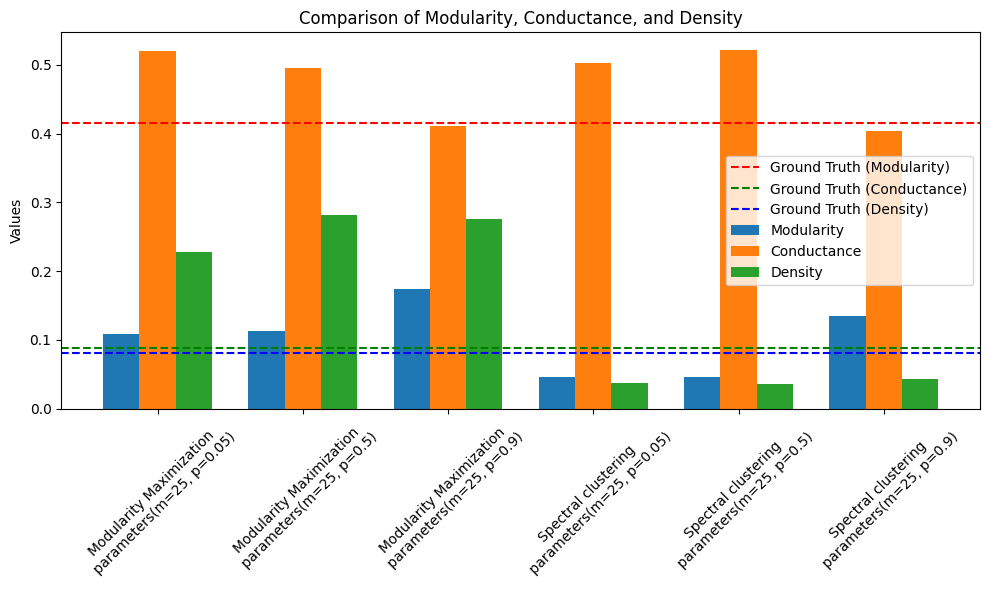

In [ ]:
methods_1 = ['Modularity Maximization\n parameters(m=25, p=0.05)', 'Modularity Maximization\n parameters(m=25, p=0.5)',
             'Modularity Maximization\n parameters(m=25, p=0.9)', 'Spectral clustering\n parameters(m=25, p=0.05)',
             'Spectral clustering\n parameters(m=25, p=0.5)', 'Spectral clustering\n parameters(m=25, p=0.9)']

modularity_1 = [mod_1, mod_2, mod_3, mod_4, mod_5, mod_6]
conductance_1 = [con_1, con_2, con_3, con_4, con_5, con_6]
density_1 = [den_1, den_2, den_3, den_4, den_5, den_6]

# Setting the width of each bar
width = 0.25

# Creating the x-axis values for the bars
x = np.arange(len(methods_1))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, modularity_1, width, label='Modularity')
rects2 = ax.bar(x, conductance_1, width, label='Conductance')
rects3 = ax.bar(x + width, density_1, width, label='Density')
# Adding ground truth values as horizontal lines
ax.axhline(ground_truth_modularity, color='red', linestyle='--', label='Ground Truth (Modularity)')
ax.axhline(ground_truth_conductance, color='green', linestyle='--', label='Ground Truth (Conductance)')
ax.axhline(ground_truth_density, color='blue', linestyle='--', label='Ground Truth (Density)')

# Setting labels and ticks
ax.set_ylabel('Values')
ax.set_title('Comparison of Modularity, Conductance, and Density')
ax.set_xticks(x)
ax.set_xticklabels(methods_1, rotation=45)
ax.legend()

# Adjusting layout
plt.tight_layout()

# Displaying the graph
plt.savefig('/content/drive/MyDrive/networks analysis/hw2/comparison_of_synthetic_networks')
plt.show()




